In [1]:
import sys
import os
sys.path.insert(0, "../../python")

from beam.beams import laserpulse
from beam.elements import plasma
from beam import interactions
import numpy as np

path = '/media/robert/Data_Storage/Data/Tests/Beam_Pulse/'

In [2]:
pulseParams = {'Nx' : 2**10,
               'Ny' : 2**10,
               'Nt' : 2**6,
               'X' : 2000,
               'Y' : 2000,
               'T' : 100,
               'lam' : 0.8,
               'path' : path,
               'name' : 'testPulse',
               'threads' : 4,
               'cyl' : True,
               'E0' : 100,
               'waist' : 100,
               'z0' : -0.25e6,
               'tau' : 35}

pulse = laserpulse.GaussianPulse(pulseParams)

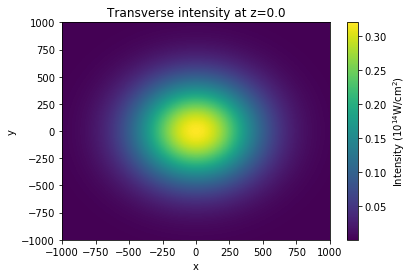

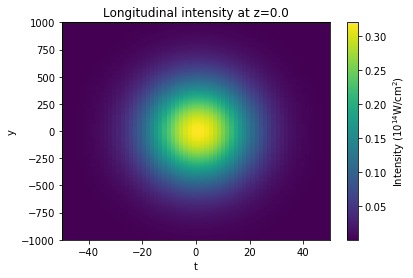

In [3]:
pulse.plot_current_tran_intensity()
pulse.plot_current_long_intensity()

In [4]:
plasmaParams = {'Nx' : pulseParams['Nx'],
                'Ny' : pulseParams['Ny'],
                'Nz' : 2,
                'X' : pulseParams['X'],
                'Y' : pulseParams['Y'],
                'Z' : 0.1,
                'n0': 0.1,
                'atom' : {'EI' : 15.7596,
                          'Z' : 1,
                          'l' : 1,
                          'm' : 0,
                          'alpha' : 1.664},
                'path' : path,
                'name' : 'testPlasma',
                'cyl' : True}

argon = plasma.Plasma(plasmaParams)

In [5]:
#interactions.pulse_uniform_gas(pulse, argon)

In [6]:
import cProfile
%load_ext line_profiler
from line_profiler import LineProfiler
%load_ext memory_profiler
#import timeit

import beam.calc.plasma as pcalc

def do_profile(follow=[]):
    def inner(func):
        def profiled_func(*args, **kwargs):
            try:
                profiler = LineProfiler()
                profiler.add_function(func)
                for f in follow:
                    profiler.add_function(f)
                profiler.enable_by_count()
                return func(*args, **kwargs)
            finally:
                profiler.print_stats()
        return profiled_func
    return inner

@do_profile(follow=[pcalc.plasma_refraction])
def test(pulse, argon):
    interactions.pulse_uniform_gas(pulse, argon)
    
result = test(pulse, argon)

Timer unit: 1e-06 s

Total time: 648.508 s
File: <ipython-input-6-9accda98dd53>
Function: test at line 24

Line #      Hits         Time  Per Hit   % Time  Line Contents
    24                                           @do_profile(follow=[pcalc.plasma_refraction])
    25                                           def test(pulse, argon):
    26         1    648507780 648507780.0    100.0      interactions.pulse_uniform_gas(pulse, argon)

Total time: 382.092 s

Could not find file beam/calc/plasma.pyx
Are you sure you are running this program from the same directory
that you ran the profiler from?
Continuing without the function's contents.

Line #      Hits         Time  Per Hit   % Time  Line Contents
    31                                           
    32                                           
    33                                           
    34                                           
    35                                           
    36                                  